# import prerequisite

In [ ]:
import matplotlib.pyplot as plt   
import numpy as np                
import pandas as pd               
import pickle                     # For loading and saving Python objects in binary format
# data path:https://gitlab.com/quantum-machine-learning/autoencoder-entanglement-detection-optimizer
#  About pickle:
#  pickle is used to convert Python objects into a byte stream to store in a file.
#  You can later load back  them to the original Python object.

from sklearn.model_selection import train_test_split  # For splitting your dataset into training and test sets
from sklearn.metrics import accuracy_score            # For calculating model accuracy (fraction of correct predictions)


# open data and split into train and test

In [4]:
# Load a pickled DataFrame from a binary file
# 'rb' means "read binary"
df = pickle.load(open("F:\programming\machine learning\quantum entangelment data", 'rb'))

# Split the DataFrame into features (X) and labels (y)
# X = all columns except the last 
X = df.iloc[:, :-1]  # Select all rows, and all columns except the last one

# y = last column (target label)
y = df.iloc[:, -1]   # Select all rows, and only the last column

# Split data into training and testing sets
# 70% of the data goes to training, 30% to testing
#  the split will be different every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# build Ridge Classifier

In [5]:
def RidgeClassifier(x_train, y_train, alpha):
    # Computes the Ridge Classifier weights using the closed-form solution:
    # W = (XᵀX + αI)⁻¹ Xᵀy

    W = np.linalg.inv(
            x_train.T @ x_train + alpha * np.eye(x_train.shape[1])
        ) @ x_train.T @ y_train
    
    return W  # returns the computed weight vector W


# compute accuracy of model

In [6]:
def accuracy(X_train, y_train, X_test, y_test, alpha):   
    # Compute weight vector using our custom Ridge Classifier
    w = RidgeClassifier(X_train, y_train, alpha)

    Y = []  

    # Loop through each row in the test set
    for i, row in enumerate(X_test.to_numpy()):
        y_pred = np.dot(row, w)        # Compute raw score 
        y_class = int(y_pred >= 0.0)   # Apply threshold 
        Y.append(y_class)              # Store predicted class

    # Convert list of predictions to a NumPy array
    y_pred = np.array(Y)

    # Calculate classification accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Example usage: compute accuracy with alpha = 0.1
accuracy(X_train, y_train, X_test, y_test, 0.1)


0.8896666666666667

# validition curve

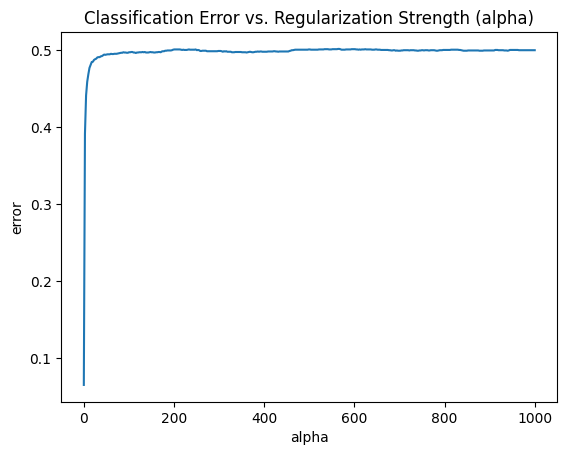

In [7]:
# Create 400 alpha values from 0 to 1000
alphas = np.linspace(0, 1000, 400)

errors = []  

# Evaluate error across all alphas
for alpha in alphas:
    error = 1 - accuracy(X_train, y_train, X_test, y_test, alpha)  # Error = 1 - accuracy
    errors.append(error)

# Plot error vs. alpha
plt.plot(alphas, errors)
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Classification Error vs. Regularization Strength (alpha)')
plt.show()